# <u>Data Wrangling</u>
#### Name: Ujwal Kavalipati



Date: 18/12/2020

Version: 1.2

Environment: Python 3.7.3 and Anaconda 4.3.0 (64-bit) 

Libraries used:

* **pandas 0.19.2** (to save the data into a csv file, included in Anaconda Python 3.6) 
* **re 2.2.1** (for regular expressions, included in Anaconda Python 3.6) 
* **requests** for downloading the pdf files from the links
* **glob** to get the downloaded text files
* **nltk** for tokenizing, removing stopwords, getting bigrams and calculating frequency distribution
* **chain** from **itertools** to get the list of tokens


# <u>Introduction</u>:

## Text Pre-Processing & Feature Generation:

- This assessment focuses on the next step of analyzing textual data, i.e., extracting data from non-structured format and converting the extracted data into a proper format suitable for a downstream modelling task. 
- In this assessment, we are required to write Python code to preprocess a set of published papers and convert them into numerical representations (which are suitable for input into NLP AI systems, recommender-systems, information-retrieval algorithms, etc.)

## Step 0: Importing the necessary libraries:

In [1]:
import re
import requests
import glob
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
from nltk.probability import *
from nltk.tokenize import MWETokenizer
from itertools import chain
from nltk.stem import PorterStemmer
import nltk.data
import pandas as pd

## Step 1: Downloading and converting pdf to text file:
The first step in our assignment was to download the Group172 file which is a pdf file from the google drive. Then we used the below command to convert that pdf file into text file. The pdf file consists of 200 links for 200 pdf documents.<br> 
`pdf2txt.py -o Group172.txt Group172.pdf`<br>

This command converted Group172.pdf to Group172.txt

In [2]:
#Opening the text file Group172.txt which contains all the files to be downloaded:

pdftext=open('Group172.txt','r')

## Step 2: Downloading 200 files programmatically:
The next step is to read the converted `Group172.txt` file and download all the 200 files from the file in pdf format. For downloading the files, `request` package is used.

### Step 2.1:
`Group172.txt` file consists of the filename and the url.
The approach we followed was to separate the urls and the filenames and store them in a list and later use `requests` package to download the files programatically.<br>
We have used `re.compile()` for constructing the regex pattern used for matching the file names and the urls.
Unneccesary spaces and new line characters(`\n`) are removed while extracting the filenames and the urls.
`re.match()` is used for matching the compiled regex pattern with the each line of the file where filename are url are present.

In [3]:
pdflist=[]                                                                # Creating the list to store all the pdf links
pdftitle=[]
pdftext.seek(0)
reg=re.compile("(PP\d{4})\.pdf(.*)")                                      # Compiling a regex for matching pdftitles starting with PP followed by 4 digits
islink=False                                                              # Creating a boolean variable for extracting pdfs
def clean(line):                                                          # Function for cleaning the file
        line = line.strip('\n')                                           # Remove leading and trailing '\n' 
        line = line.strip()                                               # Remove leading and trailing while spaces
        return line
for line in pdftext:
    line=clean(line)
    if(line.startswith('filename') or line.startswith('url')):            # Setting the boolean value for lines starting with 'filename' or 'url'
        islink=True
    elif re.match(reg,line)!=None:                                        
        link=(re.match(reg,line).group(2))                                # Matching with the url
        title=(re.match(reg,line).group(1))                               # Matching the title
        pdflist.append(link)                                              # Appending to the list of pdfs
        pdftitle.append(title)                                            # Appending to the list of titles

### Step 2.2:
Using **requests** package to download the 200 files:

In [4]:
# Using this set of code to programmatically download all the pdf files from the links.pdflist consisting of all the urls:
"""
for i in range(len(pdflist)):                                      # Iterating through all the elements of pdflist
    r=requests.get(pdflist[i])                                     # To get the files in binary format
    str1=pdftitle[i]
    str1=str1+'.pdf'                                               # Appending .pdf to pdftitle for naming the downloaded pdf
    with open(str1,'wb') as file:
        file.write(r.content)    """                                  # Writing the content to the pdf file    

"\nfor i in range(len(pdflist)):                                      # Iterating through all the elements of pdflist\n    r=requests.get(pdflist[i])                                     # To get the files in binary format\n    str1=pdftitle[i]\n    str1=str1+'.pdf'                                               # Appending .pdf to pdftitle for naming the downloaded pdf\n    with open(str1,'wb') as file:\n        file.write(r.content)    "

### Step 2.3: Converting 200 pdf files to text files:
We have written a bash script to convert the pdf files into text files one by one in linux.<br>
filenames is a file containing all the pdf files<br>
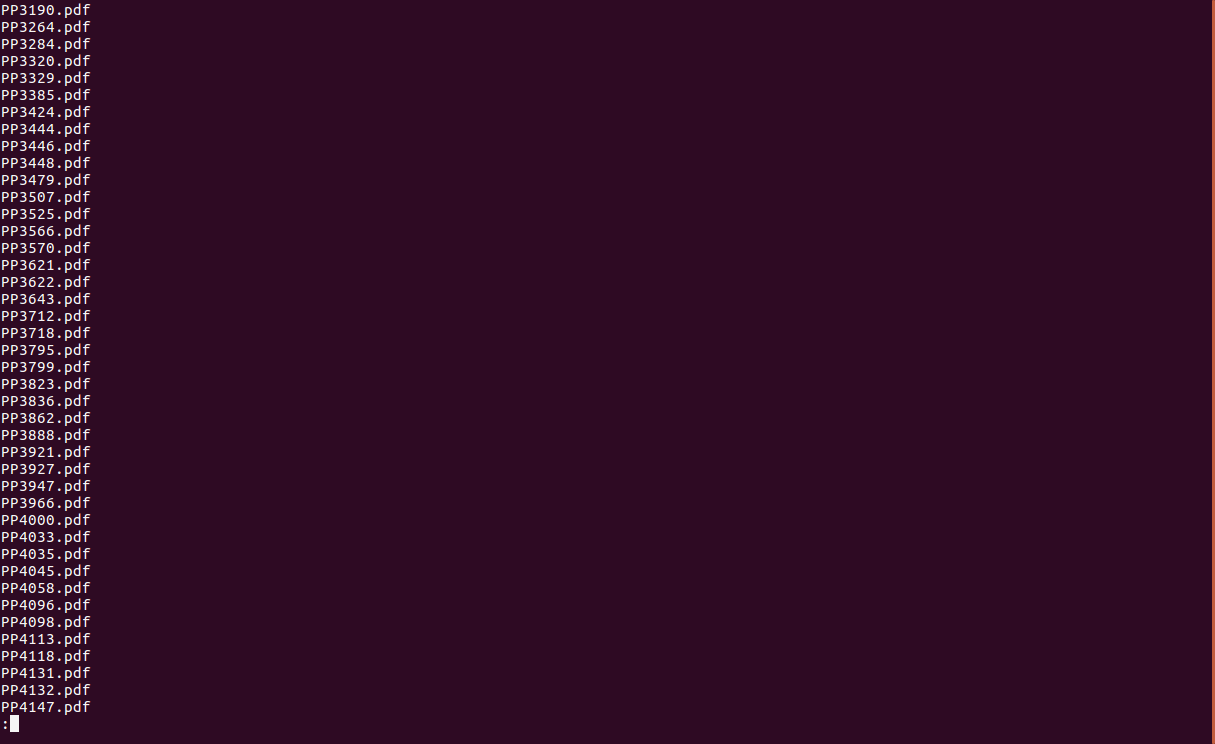
<br> The below script converted all the pdf files to text files:
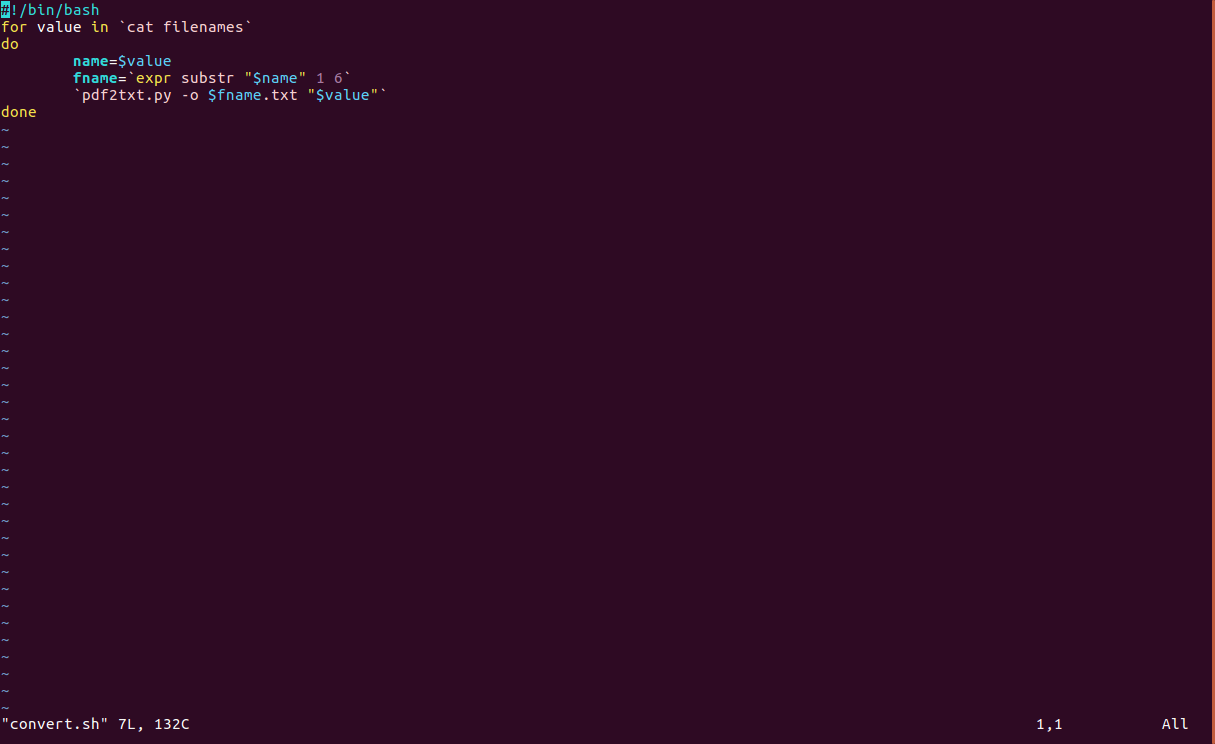



# Step 3: Reading all the files and extracting the necessary attributes:

- The attributes which we want to extract are `Titles`, `Authors`, `Abstracts` and `Paper Body`.

### Step 3.1:
- For this, the first step is to read all the converted text files and for each file extract the text required using regular expressions.
- Here `re.sub` is used to substitute any `-` with a new line character `\n`. `re.DOTALL` will make the '.' to match any character at all, including a newline; without this flag, '.' will match anything except a newline and we are using this since we have paragraphs(multiline sentences) to extract for Paper Bodies.
- We are storing `Paper Bodies` in a dictionary as we want to calculate **sparse vectors** for the 200 files.


In [5]:
# A list of all txt file in the current dir
files = glob.glob("PP*.txt")

# the dictionary that will hold the file names (key) and content (value)
dicFilenames = {}
# Open the files:
# The keys will hold the filenames and the values will hold the contents of each file
for file in files:
    with open(file, 'r', encoding='utf-8') as read:
        # the key will hold the name the value the content
        text=read.read()
        text=re.sub(r"-\n",'',text)
        pBod=re.search('1 Paper Body(.*?)2 References',text,re.MULTILINE | re.DOTALL)
        dicFilenames[file]=pBod.group(1)
dicFiles = { k.replace('.txt', ''): v for k, v in dicFilenames.items() }

### Step 3.2: Extracting the attributes:

* The `Title` are present before the text `Authored by:`; so re.search with **`(.*?)`** is used to get everything before `Authored by:`.
* `Author names` are between 'Authored by:' and 'Abstract', `Abstracts` are between 'Abstract' and '1 Paper Body' while `Paper Body` are to be extracted from '1 Paper Body' to '2 References' and the same regular expression is used to match the text.

In [6]:
title_list=[]                                                                     ## Creating list to hold titles
author_list=[]                                                                    ## Creating list to hold authors
abstract_list=[]                                                                  ## Creating list to hold abstracts

for i in pdftitle:
    fname=i+".txt"
    fp=open(fname,'r',encoding="UTF8")
    lines=fp.read()
    title=re.search('(.*?)Authored by:',lines,re.MULTILINE | re.DOTALL)
    author=re.search('Authored by:(.*?)Abstract',lines,re.MULTILINE|re.DOTALL)
    abstract=re.search('Abstract(.*?)1 Paper Body',lines,re.MULTILINE|re.DOTALL)
    title_list.append(title.group(1))
    author_list.append(author.group(1))
    abstract_list.append(abstract.group(1)) 


## Step 4: Segmentation of paper body:

* The first step is to segment them into sentences using `'tokenizers/punkt/english.pickle'` from `nltk`. 
* The next step is to change the first words of the sentences into lowercase and append the changed words back to the lists and also updating the dictionary values.

In [7]:
for (keys,text) in dicFiles.items():
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    dicFiles[keys]=sent_detector.tokenize(text.strip())
for (keys,text) in dicFiles.items():
    list1=[]
    for word in text:
        fWord = re.findall("^[A-Za-z]+|\.\s+[a-zA-Z]+",word)
        for wrd in fWord:
            newWrd=wrd.lower()
            word=word.replace(wrd,newWrd)
        list1.append(word)
    dicFiles[keys]=list1

## Step 5: Tokenization of paper body

- Next step is tokenization of the segemented paper bodies. 
- **Tokenizing** raw text data is an important pre-processing step for many NLP methods. 
- As explained on wikipedia, tokenization is “the process of breaking a stream of text up into words, phrases, symbols, or other meaningful elements called tokens.”
- We tokenize the data into individual words using `RegexpTokenizer(r"[A-Za-z]\w+(?:[-'?]\w+)?", gaps=False)`. Here, gaps=False is given to set the delimiter as to not match the words.


### Removing Stop words
[Stopwords](https://en.wikipedia.org/wiki/Stop_words) are words that are extremely common and carry little lexical content. For many NLP and text mining tasks, it is useful to remove stopwords in order to save storage space 
and speed up processing, and the process of removing these words is usually called “stopping”. Stopwords are provided in many different languages and for our assignment we are using stopwords from English language (`context-independent stopwords`) and storing them into a list.

In [8]:
# Tokenising the text, creating the stopwords list from given stopwords_en file and removing those stopwords from our tokens:

from nltk.tokenize import RegexpTokenizer
stopwords_list = []
tokenizer = RegexpTokenizer(r"[A-Za-z]\w+(?:[-'?]\w+)?", gaps=False)
with open('./stopwords_en.txt') as f:
    stopwords_list = f.read().splitlines()
for (keys,text) in dicFiles.items():
    list_tokens=[]
    for gline in text:
        tokens = tokenizer.tokenize(gline)
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
        vocab_tokens = [token for token in filtered_tokens if len(token)>=3]
        list_tokens.append(vocab_tokens)
    dicFiles[keys]=list_tokens

In [9]:
## Updating the dictionary with lists of tokens:

for key,value in dicFiles.items():
    value=[item for sublist in value for item in sublist]
    dicFiles[key]=value

## Step 6: Creating bigrams:

- N-grams of texts are extensively used in various text analysis tasks.
- They are basically contiguous sequences of **`n`** words from a given sequence of text.
- When computing the n-grams we typically move a fixed size window of size n words forward.
- Extracting from a text a list of n-gram can be easily accomplished with function `ngrams()` and for bigrams we use *n=2*.
- To get the most frequent bigrams, we first use `FreqDist()` function from `nltk.probability` to calculate how many times a bigram is appearing in the whole text and then use `most_common()` to get the top most frequent bigrams.

In [10]:
## Getting all the tokens for all the files into 1 list:

all_tokens = [] 
items = dicFiles.items() 
for item in items: 
    all_tokens.append(item[1]) 
all_tokens1=[item for sublist in all_tokens for item in sublist]         ## Flattening the list of lists
len(all_tokens1) 

396455

In [11]:
bigrams = ngrams(all_tokens1, n = 2)
fdbigram = FreqDist(bigrams)
fdbig=fdbigram.most_common(250)

#### Finding 200 top most frequent and meaningful bigrams:

- For this purpose, we filter out those words which make less sense like (log,log), (min,min) or (min,max) etc and get 200 most frequent bigrams

In [12]:
my_bigrams=[]
for i in range(len(fdbig)):
    if len(fdbig[i][0][0])>3:
        my_bigrams.append(fdbig[i])

        
my_bigrams=my_bigrams[0:200]  
my_bigrams

[(('lower', 'bound'), 210),
 (('training', 'set'), 187),
 (('optimization', 'problem'), 178),
 (('loss', 'function'), 174),
 (('machine', 'learning'), 167),
 (('upper', 'bound'), 161),
 (('objective', 'function'), 157),
 (('gradient', 'descent'), 154),
 (('supplementary', 'material'), 153),
 (('data', 'points'), 133),
 (('strongly', 'convex'), 131),
 (('training', 'data'), 122),
 (('high', 'probability'), 117),
 (('state-of', 'the-art'), 111),
 (('optimal', 'solution'), 111),
 (('learning', 'algorithm'), 108),
 (('ground', 'truth'), 106),
 (('lower', 'bounds'), 103),
 (('sample', 'complexity'), 103),
 (('neural', 'networks'), 99),
 (('learning', 'algorithms'), 99),
 (('sample', 'size'), 99),
 (('special', 'case'), 98),
 (('Monte', 'Carlo'), 95),
 (('step', 'size'), 95),
 (('figure', 'shows'), 94),
 (('future', 'work'), 93),
 (('random', 'variable'), 92),
 (('neural', 'network'), 91),
 (('running', 'time'), 91),
 (('random', 'variables'), 91),
 (('stochastic', 'gradient'), 90),
 (('conv

In [13]:
## Counting the unique tokens in the files. For this we use set() on the list which contains all the tokens:

uni_voc = list(set(all_tokens1))
print (len(uni_voc))

25538


In [14]:
## Appending the top 200 bigrams to the list of unigrams:

for i in range(len(my_bigrams)):
    uni_voc.append(my_bigrams[i][0])

#### MWETokenizer:

- A tokenizer that processes tokenized text and merges multi-word expressions into single tokens and then updating the dictionary with those tokens

In [15]:
from nltk.tokenize import MWETokenizer
latest_tokens=[]

def mwtok(value):
    mwe_tokenizer = MWETokenizer(uni_voc,separator='__')
    latest_tokens = mwe_tokenizer.tokenize(value)
    return latest_tokens

for key,value in dicFiles.items():
    dicFiles[key]=mwtok(value)

## Step 7: Document Frequency:

Here we are going to count how many documents a word appears in, which is referred to as document frequency.

We can use  <font color="blue">FreqDist()</font> jointly with  <font color="blue">set()</font> as follows:
1. Apply  <font color="blue">set()</font> to each dictionary value to generate a set of unique words in the article and save all sets in a list

2. We put all the words in a list using  <font color="blue">chain.from_iterable</font> and pass
it to  <font color="blue">FreqDist</font>.

The first step makes sure that each word in an article appears only once, thus the total number of 
times a word appears in all the sets is equal to the number of documents containing that word.

In [16]:
## Calculating the document frequency:

words_2 = list(chain.from_iterable([set(value) for value in dicFiles.values()]))
fd_2 = FreqDist(words_2)
mst_common = fd_2.most_common()

#### Removing context-dependent stopwords and rare tokens:

- Context-dependent stopwords with threshold of **95%** of 200 files i.e. if a word appears in more than or equal to **190** documents.
- Rare tokens with threshold of **3%** of 200 files i.e. if a word appears in less than or equal to **6** documents.

In [17]:
reduced_tokens=[]
super_tokens=[]
for i in range(len(mst_common)):
    if (mst_common[i][1])<=6 or (mst_common[i][1]>=190):
        reduced_tokens.append(mst_common[i][0])
    elif(mst_common[i][1]>6 and mst_common[i][1]<190):
        super_tokens.append(mst_common[i][0])

In [18]:
## Appending the separator '__' between the words for bigrams:

mybigram=[]
for i in range(len(my_bigrams)):
    term1=my_bigrams[i][0][0]
    term2=my_bigrams[i][0][1]
    term3=term1+"__"+term2
    mybigram.append(term3)
mybigram

['lower__bound',
 'training__set',
 'optimization__problem',
 'loss__function',
 'machine__learning',
 'upper__bound',
 'objective__function',
 'gradient__descent',
 'supplementary__material',
 'data__points',
 'strongly__convex',
 'training__data',
 'high__probability',
 'state-of__the-art',
 'optimal__solution',
 'learning__algorithm',
 'ground__truth',
 'lower__bounds',
 'sample__complexity',
 'neural__networks',
 'learning__algorithms',
 'sample__size',
 'special__case',
 'Monte__Carlo',
 'step__size',
 'figure__shows',
 'future__work',
 'random__variable',
 'neural__network',
 'running__time',
 'random__variables',
 'stochastic__gradient',
 'convergence__rate',
 'covariance__matrix',
 'number__iterations',
 'loss__functions',
 'computational__complexity',
 'shown__Figure',
 'basis__functions',
 'logistic__regression',
 'data__set',
 'Conference__Neural',
 'Processing__Systems',
 'Systems__NIPS',
 'large__number',
 'regret__bound',
 'probability__distribution',
 'maximum__likelihoo

These are the **200** top most frequent bigrams

## Step 8: Stemming

- Grouping different forms of words together and working in terms of their base form is usually known as **stemming** or **lemmatization**.
- Typically the stemming process includes the identification and removal of prefixes, suffixes, and pluralisation, and leaves you with a stem.
- Here we are going to use ***Porter Stemmer*** to convert different forms of words into their root words.

In [19]:
stemmer = PorterStemmer()
def wordStem(sup):
    ret_list=[]
    for word in sup:
        if word not in mybigram and word.isupper()==False:
            word=stemmer.stem(word)
            ret_list.append(word)
        else:
            ret_list.append(word)
    return ret_list

In [20]:
## Sorting the tokens alphabetically

stemmed_token=wordStem(super_tokens)
new_vocab=set(stemmed_token)
new_vocab=sorted(new_vocab)
len(new_vocab)

2130

In [21]:
# Stemming on the dicFiles:

for key,value in dicFiles.items():
    list2=wordStem(value)
    dicFiles[key]=list2

### Note:

There are some words like **algorithm** and **algorithms** which are not stemmed to their stem word wherein algorithms should have been stemmed to algorithm. Hence both of these words will appear in the **172_vocab.txt**. There could be many more words like this.

## Step 9:

- This step consists of creating a text file **172_vocab.txt** with the sorted tokens along with a unique index.
- Another file **172_count_vectors.txt** which includes the filename along with the word position in the **172_vocab.txt** and the number of times it appears in the document is to be created.

In [22]:
## Creating vocab.txt:

outFile = open("./172_vocab.txt", 'w',encoding="UTF8")
allcaps=[]
uplist=[]
lowerlist=[]
for i in new_vocab:
    if i.isupper()==True:
        uplist.append(i)
    elif re.search('[A-Z]+',i)!=None:
        allcaps.append(i)
    else:
        lowerlist.append(i)
                                
vocab = sorted(uplist)+sorted(allcaps)+sorted(lowerlist)
vocab_dict = {}
i = 0
for w in vocab:
    vocab_dict[w] = i
    outFile.write("{}:{}".format(w,i))
    outFile.write('\n')
    #print("{}:{}").format(w,i)
    i=i+1
outFile.close()

In [23]:
out_file = open("./172_count_vectors.txt", 'w',encoding="UTF8")
for ke,d in dicFiles.items():
    d_idx = []
    for w in d:
        if w in vocab:
            d_idx.append(vocab_dict[w])
    out_file.write(ke+',')
    i=0
    for k, v in FreqDist(d_idx).items():
        
        
        if list(FreqDist(d_idx).keys())[-1] !=k:
            out_file.write("{}:{},".format(k,v))
        else:
            out_file.write("{}:{}".format(k,v))
        i+=1
    out_file.write('\n')
out_file.close()
            

# Statistics Generation:

In this task, top 10 `Abstracts`, `Titles` and `Authors` are to be found from the 200 documents. 
* All the extracted data is in the respective lists and the first step is to segment them into sentences using `'tokenizers/punkt/english.pickle'` from `nltk`. Segmentation is not performed for Authors as we have to preserve the first name and last name of the authors
* The next step is to change the first words of the sentences into lowercase and append the changed words back to the lists.


In [24]:
#This set of code is used for segmenting abstracts and converting them to lowercase when tokens come in the line:

abstracts=[]

for i in abstract_list:
    i=re.sub(r"-\n",'',i)
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    seg=sent_detector.tokenize(i.strip())
    for j in seg:
        first=re.findall("^[A-Za-z]+|\.\s+[a-zA-Z]+",j)
        for k in first:
            m=k.lower()
            i=i.replace(k,m)
    abstracts.append(i)

* Now we tokenize the data into individual tokens using `RegexpTokenizer(r"[A-Za-z]\w+(?:[-'?]\w+)?", gaps=False)`. Here, gaps=False is given to set the delimiter as to not match the words. We are doing tokenisation for title_list and abstract and storing them into two lists.

In [25]:
# Converting titles and abstracts into tokens:

token_title=[]
abstract_list=[]

tokenizer = RegexpTokenizer(r"[A-Za-z]\w+(?:[-'?]\w+)?", gaps=False)

for i in title_list:
    
    tokens = tokenizer.tokenize(i)
    token_title.append(tokens)
for i in abstracts:
    tokens = tokenizer.tokenize(i)
    abstract_list.append(tokens)
    

* To get all the `Authors` in the line, we use re.findall with the pattern `[A-Za-z].+`. We have flattened the authors list and applied FreqDist() function to know the count of each author and took the top 10 authors from that and later sort them alphabetically based on count.

In [26]:
authors=[]
for i in author_list:
    name=re.findall('[A-Za-z].+',i)
    authors.append(name)
    
#Flattening the list of lists to a single list:

authors= [item for sublist in authors for item in sublist]
fd_2 = FreqDist(authors)
fd2=fd_2.most_common(10)
fd2=(sorted(fd2, key = lambda i: (-i[1], i[0])))                          #sorting the list fd2
fd2

[('Ambuj Tewari', 3),
 ('Andrew Zisserman', 3),
 ('Csaba Szepesvari', 3),
 ('Elad Hazan', 3),
 ('John Langford', 3),
 ('Nuno Vasconcelos', 3),
 ('Inderjit S. Dhillon', 2),
 ('Peter L. Bartlett', 2),
 ('Prateek Jain', 2),
 ('Vijay Mahadevan', 2)]

### Removing Stop words
Stopwords are provided in many different languages and for our assignment we are using stopwords from English language (`context-independent stopwords`) and storing them into a list.

In [27]:
# Flattening the list of lists to a single list:

token_title= [item for sublist in token_title for item in sublist]
abstract_list=[item for sublist in abstract_list for item in sublist]

- Remove the stopwords from titles and abstracts and store the filtered tokens in `filtered_token_titles` and `filtered_abstract_tokens` respectively.

In [28]:
## Removing context independent stopwords:

filtered_token_titles = []
filtered_abstract_tokens=[]
for word in token_title:
    if word not in stopwords_list:
        filtered_token_titles.append(word.lower())
for word in abstract_list:
    if word not in stopwords_list:
        filtered_abstract_tokens.append(word)


- Calculate the top 10 most common terms in titles in the 200 documents:We have used FreqDist() function and most_common function to get the most common terms in token titles.

In [29]:
fd_1 = FreqDist(filtered_token_titles)
fd1=fd_1.most_common(10)
fd1

[('learning', 47),
 ('inference', 14),
 ('networks', 12),
 ('bayesian', 12),
 ('models', 11),
 ('optimization', 11),
 ('stochastic', 10),
 ('approach', 9),
 ('data', 9),
 ('robust', 8)]

- Calculate the top 10 most common terms in abstracts in the 200 documents:

In [30]:
fd_3=FreqDist(filtered_abstract_tokens)
fd3=fd_3.most_common(10)
fd3

[('learning', 178),
 ('data', 141),
 ('algorithm', 140),
 ('model', 130),
 ('problem', 128),
 ('show', 116),
 ('methods', 101),
 ('algorithms', 92),
 ('method', 83),
 ('models', 83)]

- Extract the words from the most frequent and store them into 3 lists for titles, abstracts and authors.

In [31]:
list1=[]
list2=[]
list3=[]
for m in range(10):
    list1.append(fd3[m][0])
    list2.append(fd1[m][0])
    list3.append(fd2[m][0])
    

- Using pandas dataframe to save the lists into the CSV file `'stats.csv'`.

In [32]:
# Creating a list of lists from 3 columns:

import pandas as pd
zippedList=list(zip(list1,list2,list3))
df=pd.DataFrame(zippedList,columns=['top10_terms_in_abstracts','top10_terms_in_titles','top10_authors'])

In [33]:
df.to_csv('172_stats.csv',index=False)

# Summary:

This task for wrangling gives a brief idea about preparing data from pdf formats into machine-readable text. This process involves tokenization, removing stopwords, creating ngrams, frequency distribution and various statistics to visualize the contents in a particular format. Regular expressions were used indicating their importance in every part of the process.

# References:

1. https://docs.python.org/3/library/glob.html - To get the text files from the current directory
2. http://jeffreyfossett.com/2014/04/25/tokenizing-raw-text-in-python.html - Definition of tokenization
3. https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists - Flattening of lists
4. regex101.com- for understanding regular expressions
5. https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk - nltk usage